In [36]:
import pandas as pd
import numpy as np
import math
from mpmath import gamma
import matplotlib.pyplot as plt

In [37]:
df = pd.read_excel('est earnings 29 Sep 2020 - 29 Sep 2023/report.xlsx')

/home/ashish/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [38]:
df['cents'] = df['Estimated earnings (USD)'] * 100

In [39]:
df

,Date,Estimated earnings (USD),Page views,Page RPM (USD),Impressions,Impression RPM (USD),Active View Viewable,Clicks,cents
0,2020-09-29,0.18,238,0.74,514,0.34,0.4669,3,18.0
1,2020-09-30,0.03,127,0.26,287,0.11,0.4618,1,3.0
2,2020-10-01,0.16,150,1.04,341,0.46,0.3697,3,16.0
3,2020-10-02,0.29,412,0.70,1027,0.28,0.4543,5,29.0
4,2020-10-03,0.21,367,0.58,1043,0.21,0.4287,4,21.0
...,...,...,...,...,...,...,...,...,...
1091,2023-09-25,0.13,25,5.29,84,1.58,0.5238,1,13.0
1092,2023-09-26,0.02,75,0.27,278,0.07,0.5458,1,2.0
1093,2023-09-27,0.02,46,0.41,145,0.13,0.4255,0,2.0
1094,2023-09-28,0.00,29,0.14,87,0.05,0.4023,0,0.0


In [40]:
print(df['cents'].value_counts())
print(df['cents'].shape[0])

0.0      227
1.0      121
2.0       83
3.0       42
6.0       40
        ... 
109.0      1
58.0       1
74.0       1
48.0       1
392.0      1
Name: cents, Length: 83, dtype: int64
1096


In [41]:
pr_zero = df['cents'].value_counts()[0] / df['cents'].shape[0]

In [42]:
lm = (1 - pr_zero) * df['cents'].mean()
lm

11.697921106611966

In [43]:
print("lambda: " + str(lm))
k_list = np.linspace(1, 15, num=15)


def get_poisson_probability(lm, k):
    ret = (1 - pr_zero) * math.pow(lm, k) * math.pow(math.e, -lm) / float(gamma(k))
    return ret

kl = []
pl = []

kl.append(0)
pl.append(pr_zero + (1 - pr_zero) * math.pow(math.e, -lm))

for i in k_list:
    kl.append(i)
    pl.append(round(get_poisson_probability(lm, i), 4))

df_report = pd.DataFrame({
    'k': kl,
    'probability': pl
})

df_report

lambda: 11.697921106611966


,k,probability
0,0.0,0.207123
1,1.0,0.000100
2,2.0,0.000900
3,3.0,0.005300
4,4.0,0.020600
5,5.0,0.060100
6,6.0,0.140700
7,7.0,0.274300
8,8.0,0.458500
9,9.0,0.670400


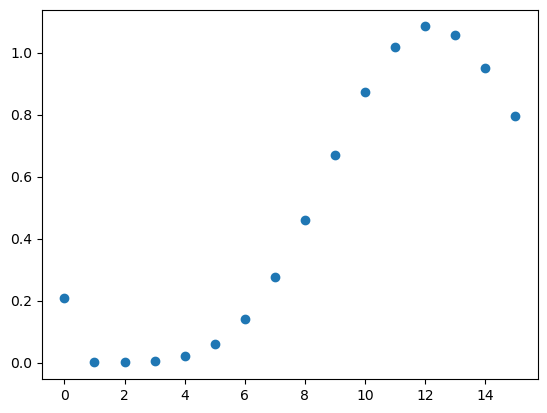

In [44]:
plt.scatter(df_report['k'], df_report['probability'])
plt.show()

In [20]:
lm = df['Estimated earnings (USD)'].mean()
print("lambda: " + str(lm))
k_list = np.linspace(0.05, 1.5, num=30)


def get_poisson_probability(lm, k):
    ret = math.pow(lm, k) * math.pow(math.e, -lm) / float(gamma(k))
    return ret

kl = []
pl = []

kl.append(0)
pl.append(math.pow(lm, 0) * math.pow(math.e, -lm) / float(math.factorial(0)))

for i in k_list:
    kl.append(round(i, 2))
    pl.append(get_poisson_probability(lm, i))

df_report = pd.DataFrame({
    'k': kl,
    'probability': pl
})

df_report

lambda: 0.14753649635036475


,k,probability
0,0.00,0.862831
1,0.05,0.040272
2,0.10,0.074899
3,0.15,0.104100
4,0.20,0.128178
5,0.25,0.147492
6,0.30,0.162441
7,0.35,0.173443
8,0.40,0.180923
9,0.45,0.185300


In [21]:
plt.scatter(df_report['k'], df_report['probability'])
plt.show()

NameError: name 'plt' is not defined